In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def clean_df(df):
    df = df.rename(mapper=str.strip, axis='columns')
    return df.rename(mapper=str.lower, axis='columns')

def co2_per_capita(co2: float, population: int) -> float:
    # multiplied by 1000000 to convert million tons to tons
    return (co2/population) * 1000000

def filter_by_countries(df, countries: list):
    return df[df['iso_code'].isin(countries)]

def filter_by_columns(df, columns: list):
    return df[columns]

def filter_by_year(df, start: int = None, end: int = None):
    if start and end:
        return df[df['year'].ge(start).le(end)]
    elif start:
        return df[df['year'].ge(start)]
    elif end:
        return df[df['year'].le(end)]
    
def prepare_df():
    co2_df = clean_df(pd.read_csv('data/co2-data.csv'))
    population_df = clean_df(pd.read_csv("data/population-by-country.csv"))
    df = co2_df.merge(population_df, on=['iso_code', 'year'])
    
    countries = ['USA', 'IND', 'CHN', 'RUS', 'AUS', 'CAN']
    columns_to_keep = ['country_x', 'year', 'iso_code', 'co2', 'co2_including_luc', 'population']
    df = filter_by_columns(df, columns_to_keep)
    df = filter_by_countries(df, countries)
    df = filter_by_year(df, start=1850).dropna()
    
    df['co2_per_capita'] = filter_by_columns(df, ['co2', 'population']).apply(lambda row: co2_per_capita(row['co2'], row['population']), axis=1)
    df['co2_including_luc_per_capita'] = filter_by_columns(df, ['co2_including_luc', 'population']).apply(lambda row: co2_per_capita(row['co2_including_luc'], row['population']), axis=1)
    return df

In [3]:
df = prepare_df()

<IPython.core.display.Javascript object>


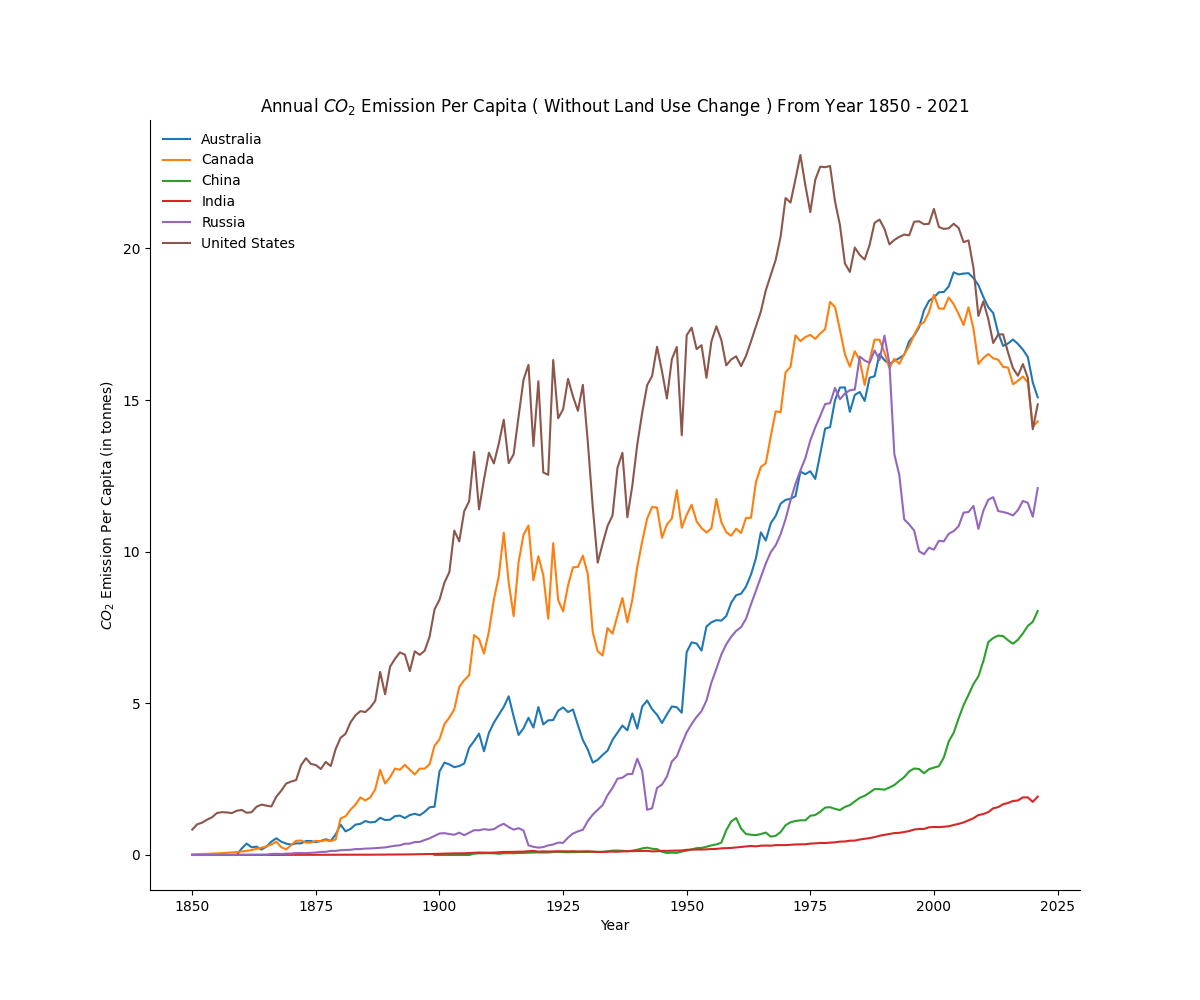

In [4]:
plt.figure(figsize=[12,10])
for country in df['country_x'].unique():
    country_df = df[df['country_x'] == country]
    plt.plot(country_df['year'], country_df['co2_per_capita'], '-', label=country)

ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("$CO_{2}$ Emission Per Capita (in tonnes)")
ax.set_title("Annual $CO_{2}$ Emission Per Capita ( Without Land Use Change ) From Year 1850 - 2021")
ax.set_xticks(range(1850, 2026, 25))
ax.spines[['top', 'right']].set_visible(False)
plt.legend(frameon=False);

<IPython.core.display.Javascript object>


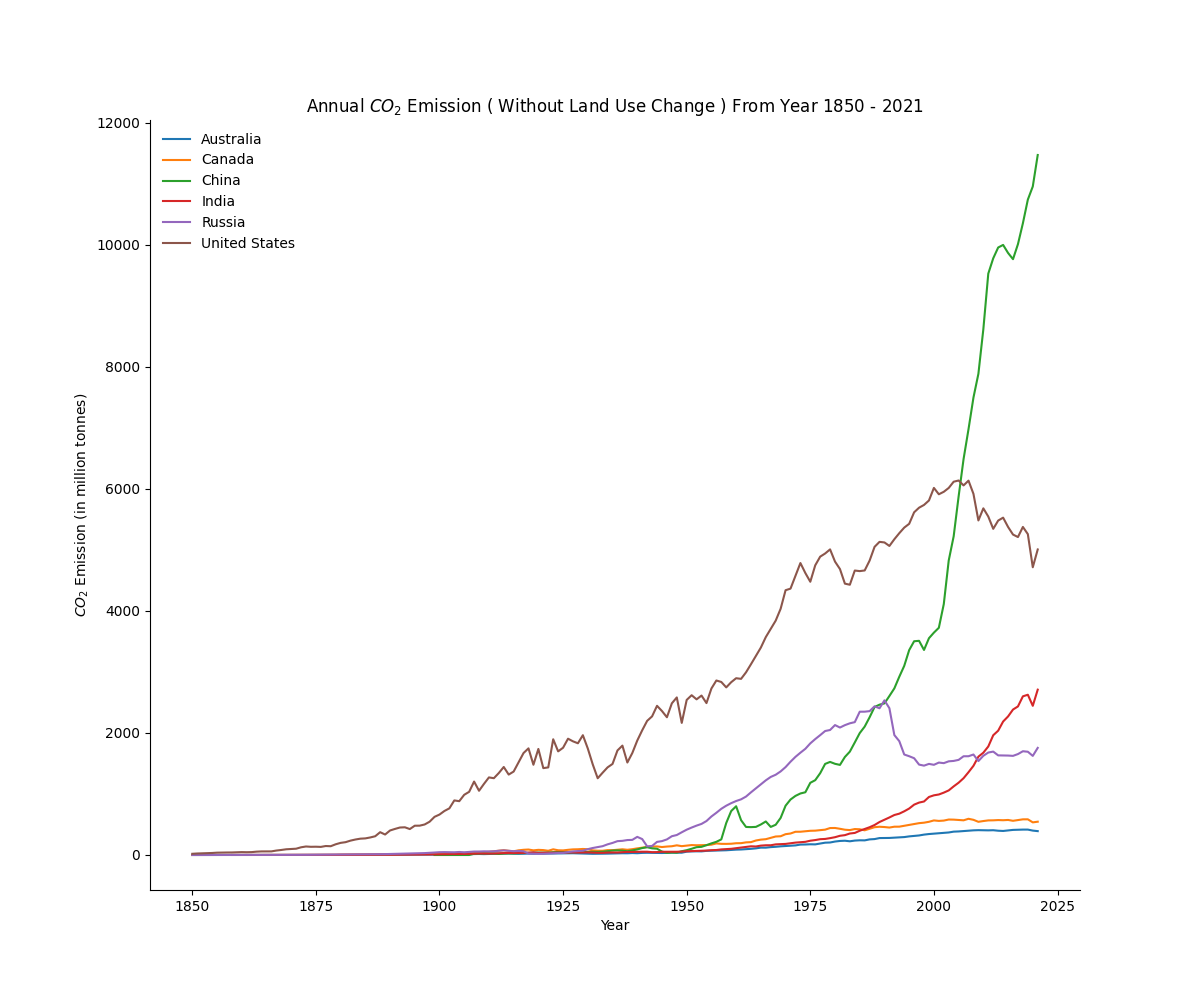

In [5]:
plt.figure(figsize=[12,10])
for country in df['country_x'].unique():
    country_df = df[df['country_x'] == country]
    plt.plot(country_df['year'], country_df['co2'], '-', label=country)
ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("$CO_{2}$ Emission (in million tonnes)")
ax.set_title("Annual $CO_{2}$ Emission ( Without Land Use Change ) From Year 1850 - 2021")
ax.set_xticks(range(1850, 2026, 25))
ax.spines[['top', 'right']].set_visible(False)
plt.legend(frameon=False);

<IPython.core.display.Javascript object>


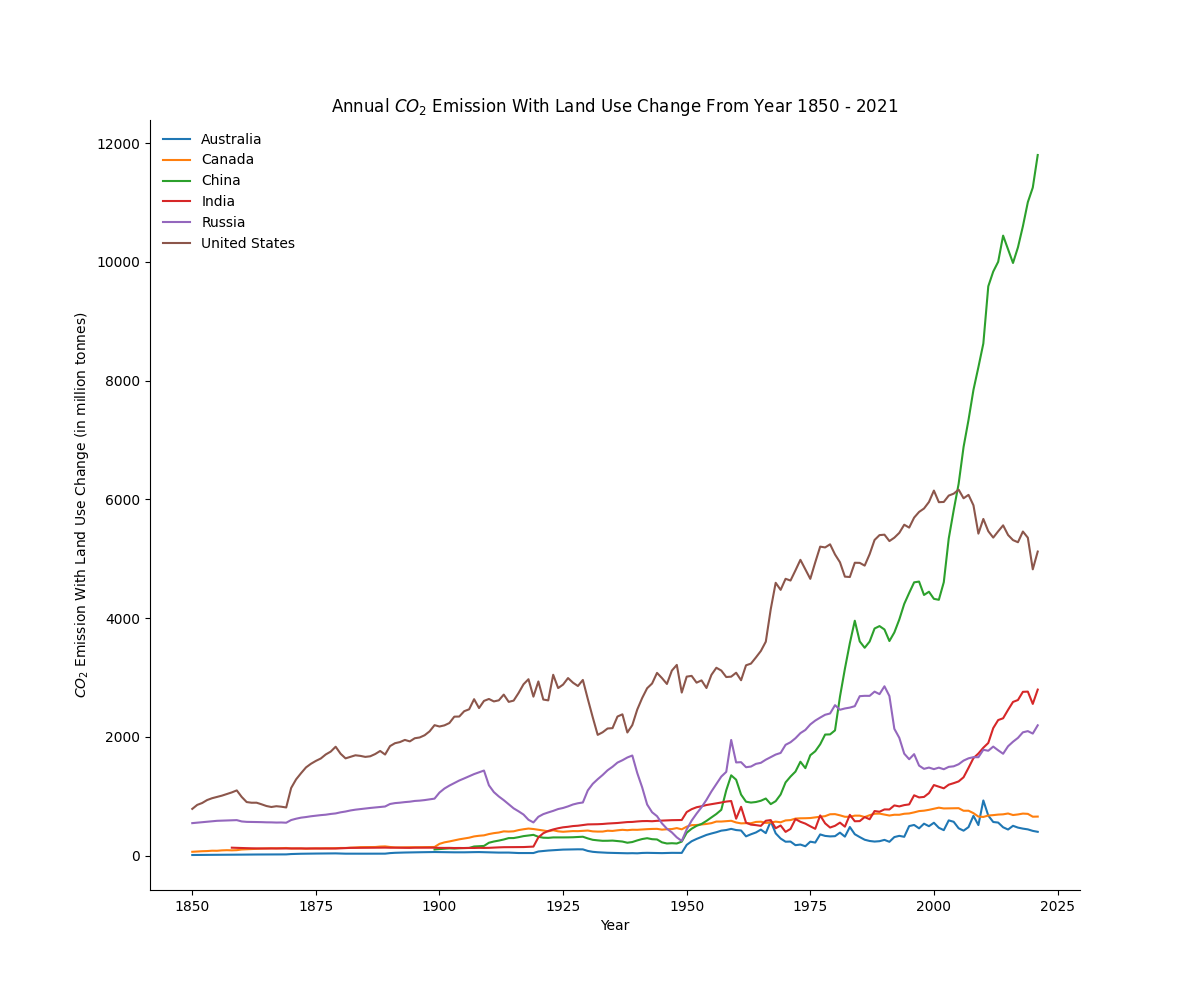

In [6]:
plt.figure(figsize=[12,10])
for country in df['country_x'].unique():
    country_df = df[df['country_x'] == country]
    plt.plot(country_df['year'], country_df['co2_including_luc'], '-', label=country)
ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("$CO_{2}$ Emission With Land Use Change (in million tonnes)")
ax.set_title("Annual $CO_{2}$ Emission With Land Use Change From Year 1850 - 2021")
ax.set_xticks(range(1850, 2026, 25))
ax.spines[['top', 'right']].set_visible(False)
plt.legend(frameon=False);

<IPython.core.display.Javascript object>


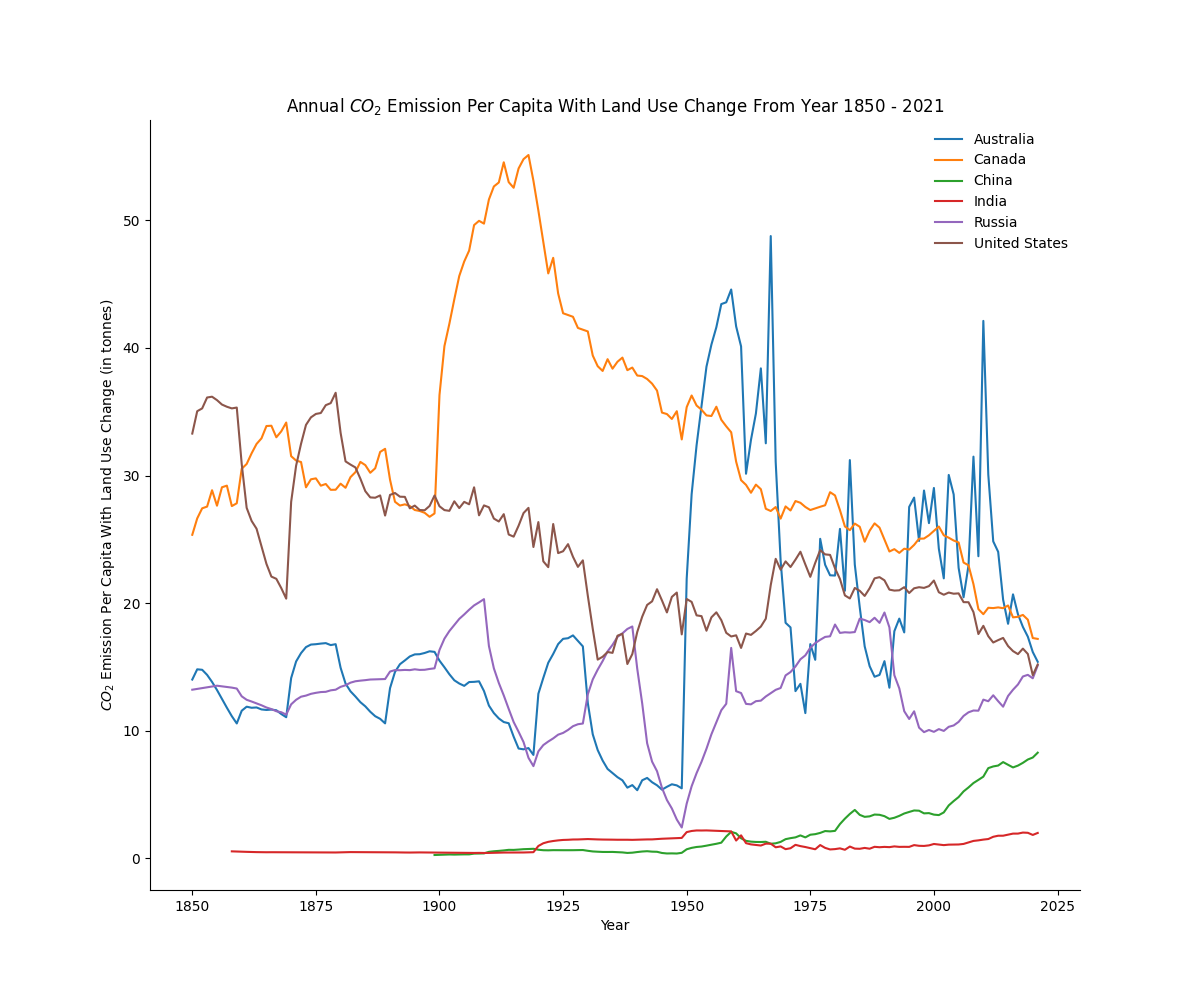

In [5]:
plt.figure(figsize=[12,10])
for country in df['country_x'].unique():
    country_df = df[df['country_x'] == country]
    plt.plot(country_df['year'], country_df['co2_including_luc_per_capita'], '-', label=country)
ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("$CO_{2}$ Emission Per Capita With Land Use Change (in tonnes)")
ax.set_title("Annual $CO_{2}$ Emission Per Capita With Land Use Change From Year 1850 - 2021")
ax.set_xticks(range(1850, 2026, 25))
ax.spines[['top', 'right']].set_visible(False)
plt.legend(frameon=False);